## Import Library

In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


## Parameter

In [33]:
img_height, img_width = 256, 256  # Maintain original resolution
batch_size = 32
num_classes = 10


In [34]:
train_dir = 'C:/Users/samsi/Documents/kelompokafrilsarti/tomato/train'
val_dir = 'C:/Users/samsi/Documents/kelompokafrilsarti/tomato//val' 

## Data Generator (Train, Validation, Test)

In [35]:
# Efficient Data Loading
AUTOTUNE = tf.data.experimental.AUTOTUNE

def preprocess(image, label):
    image = tf.image.resize(image, [img_height, img_width])
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

#training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode='categorical'  # Use categorical labels
).map(preprocess).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

#validation dataset
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode='categorical'  # Use categorical labels
).map(preprocess).cache().prefetch(buffer_size=AUTOTUNE)

Found 10000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


## Model CNN

In [36]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,194 (129.66 KB)

 Trainable params: 33,194 (129.66 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [39]:
# Callbacks
callbacks = [
    EarlyStopping(patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True, verbose=1)
]


history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.7974 - loss: 0.5910
Epoch 1: val_loss improved from None to 0.54428, saving model to best_model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 145s 465ms/step - accuracy: 0.8077 - loss: 0.5652 - val_accuracy: 0.8350 - val_loss: 0.5443
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.8042 - loss: 0.5598
Epoch 2: val_loss did not improve from 0.54428
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 454ms/step - accuracy: 0.8063 - loss: 0.5505 - val_accuracy: 0.8200 - val_loss: 0.5551
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.8336 - loss: 0.5004
Epoch 3: val_loss improved from 0.54428 to 0.53357, saving model to best_model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 124s 397ms/step - accuracy: 0.8231 - loss: 0.5203 - val_accuracy: 0.8320 - val_loss: 0.5336
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.8325 - loss: 0.4906
Epoch 4: val_loss improved from 0.53357 to 0.51245, saving model to bes

## Evaluasi Menggunakan DataSet

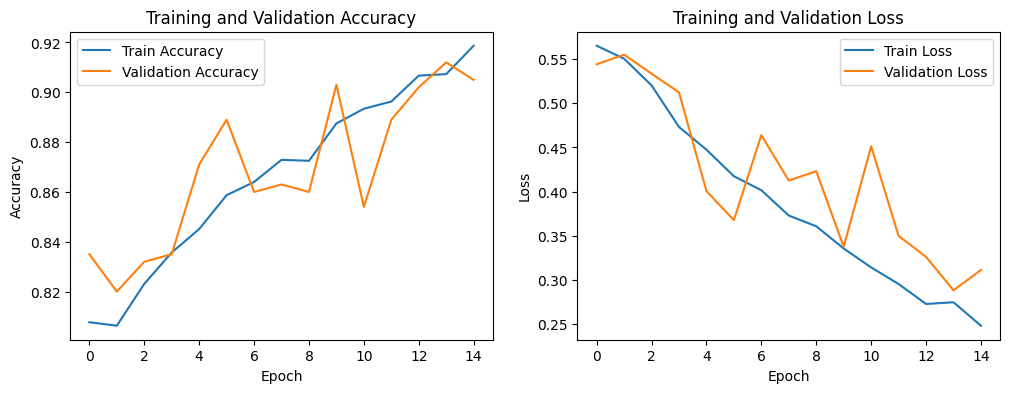

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

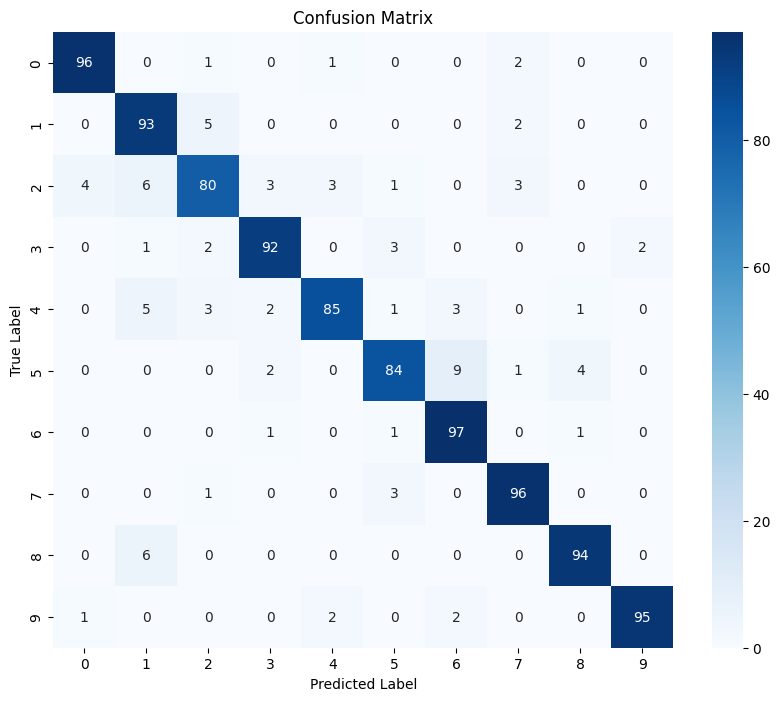

In [45]:
# Assuming history is your training history object
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.savefig('C:/Users/samsi/Documents/kelompokafrilsarti/tomato/val')  # Save the accuracy plot

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig('C:/Users/samsi/Documents/kelompokafrilsarti/tomato/val')  # Save the loss plot

plt.show()

# Confusion Matrix
val_labels = []
val_preds = []

for images, labels in val_dataset:
    val_labels.extend(np.argmax(labels.numpy(), axis=1))
    val_preds.extend(np.argmax(model.predict(images), axis=1))

conf_matrix = confusion_matrix(val_labels, val_preds)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('/kaggle/working/confusion_matrix.png')  # Save the confusion matrix plot

plt.show()

## Testing Gambar

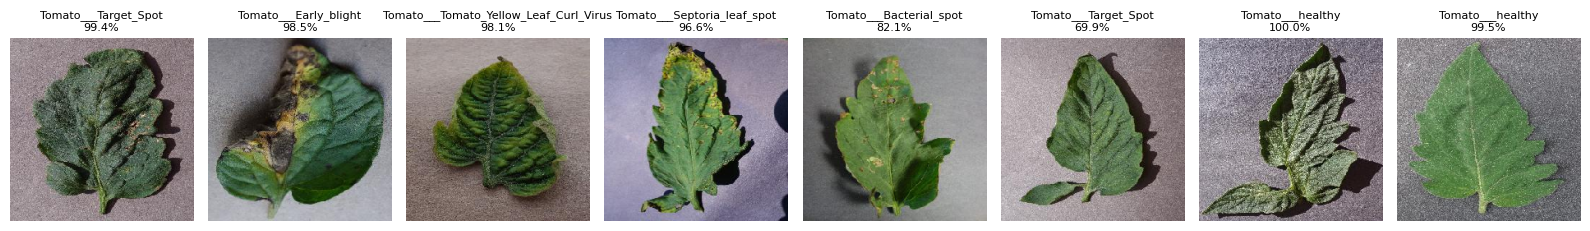

In [50]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# nama kelas
class_names = list(train_data.class_indices.keys())

# folder test
test_dir = "C:/Users/samsi/Documents/kelompokafrilsarti/tomato/val"

# kumpulkan semua gambar
all_images = []
for folder in os.listdir(test_dir):
    folder_path = os.path.join(test_dir, folder)
    if os.path.isdir(folder_path):
        for img in os.listdir(folder_path):
            all_images.append((os.path.join(folder_path, img), folder))

# jumlah gambar horizontal
num_images = 8
samples = random.sample(all_images, num_images)

# figure kecil & memanjang
plt.figure(figsize=(num_images * 2, 2.8))

for i, (img_path, actual_class) in enumerate(samples):
    img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array, verbose=0)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    plt.subplot(1, num_images, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(
        f"{predicted_class}\n{confidence:.1f}%",
        fontsize=8
    )

plt.tight_layout()
plt.show()


In [48]:
model.save("cnn_tomato_leaf_disease.h5")
